<a href="https://colab.research.google.com/github/SettibathulaJyothi/AI-ML-Internship-Projects/blob/main/Sentiment_Analysis_on_twitter_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("Tweets[1].csv")
print(df.head())
print(df.shape)

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  
(27481, 4)


In [ ]:
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment'] = df['sentiment'].map(label_map)
# Convert text to string type to avoid errors during tokenization
df['text'] = df['text'].astype(str)

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post')

In [ ]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=50),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: negative, neutral, positive
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.4000 - loss: 1.0895 - val_accuracy: 0.4057 - val_loss: 1.0873
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.4093 - loss: 1.0854 - val_accuracy: 0.4057 - val_loss: 1.0868
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.4124 - loss: 1.0834 - val_accuracy: 0.4057 - val_loss: 1.0870
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.4016 - loss: 1.0880 - val_accuracy: 0.4057 - val_loss: 1.0871
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.3986 - loss: 1.0891 - val_accuracy: 0.4057 - val_loss: 1.0870
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 44s 53ms/step - accuracy: 0.4047 - loss: 1.0874 - val_accuracy: 0.4057 - val_loss: 1.0869
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.4069 - loss: 1.0857 - val_accuracy: 0.4057 - val_loss: 1.0868
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.4044 - loss: 1.0872 - 

172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.3056 - loss: 1.0991
Test Accuracy: 0.3102


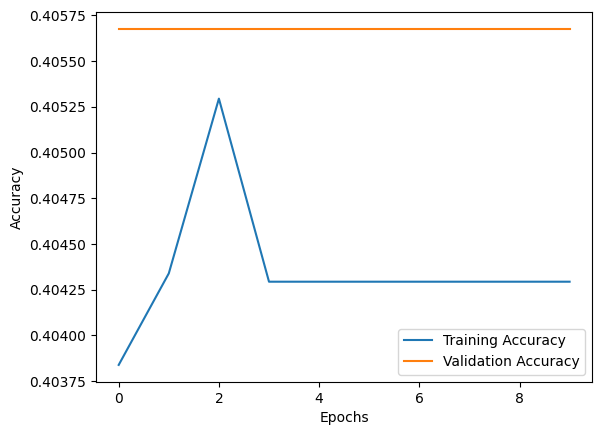

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

172/172 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step


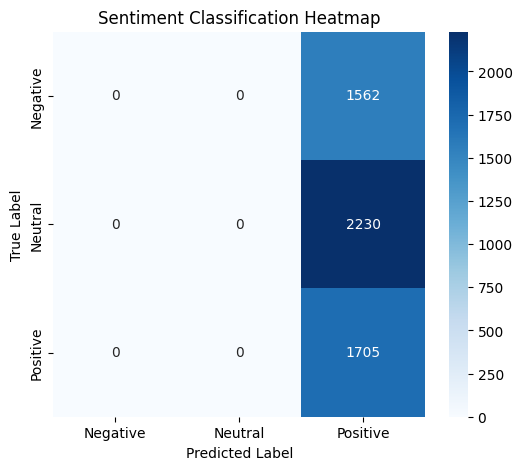

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Sentiment Classification Heatmap")
plt.show()

In [ ]:
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
new_tweet = ["I love this product! It's amazing."]
sequence = tokenizer.texts_to_sequences(new_tweet)
padded_sequence = pad_sequences(sequence, maxlen=50, padding='post')
prediction = model.predict(padded_sequence)
sentiment_class = np.argmax(prediction)
print(f"Predicted sentiment: {label_map[sentiment_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted sentiment: Neutral
